In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [48]:
#prepare data
df = pd.read_csv('../Data/china_gdp.csv')
X = df['Year'].values.reshape(-1, 1)
y = df['Value'].values

In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Polynomial Regression Model (degree=3)
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [51]:
# Linear predictions
y_pred_linear = linear_reg.predict(X_test)

# Polynomial predictions
X_poly_test = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_poly_test)

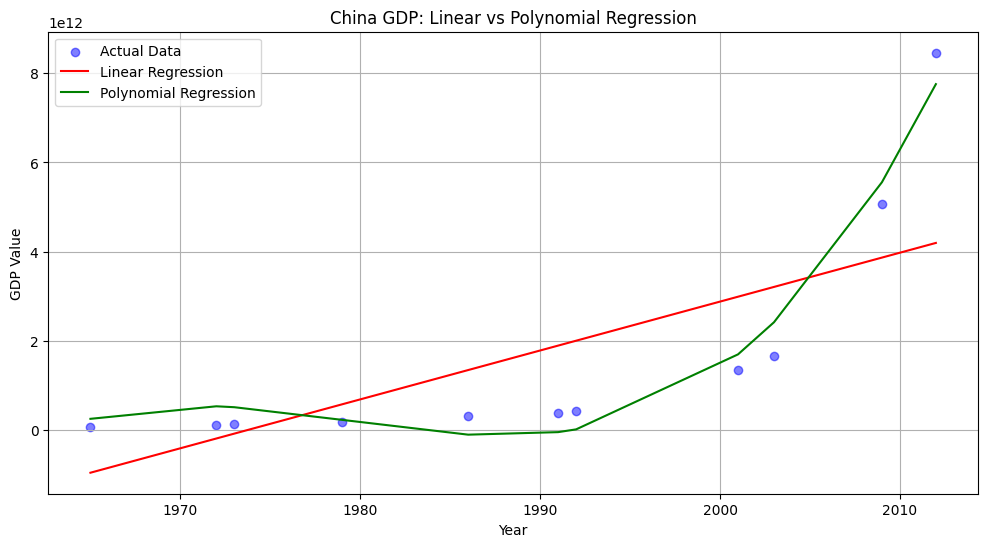

In [52]:
# Visualizing regression results
plt.figure(figsize=(12, 6))

# Sort for better visualization
sort_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sort_idx]
y_test_sorted = y_test[sort_idx]
y_pred_linear_sorted = y_pred_linear[sort_idx]
y_pred_poly_sorted = y_pred_poly[sort_idx]

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.5)

# Plot predictions
plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', label='Linear Regression')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression')

plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title('China GDP: Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression Evaluation:")
print(f"MSE: {linear_mse:,.2f}")
print(f"RMSE: {linear_rmse:,.2f}")
print(f"MAE: {linear_mae:,.2f}")

Linear Regression Evaluation:
MSE: 2,909,722,992,049,542,559,432,704.00
RMSE: 1,705,791,016,522.70
MAE: 1,341,446,144,991.78


In [54]:
# Evaluate Polynomial Regression
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, y_pred_poly)

print("\nPolynomial Regression Evaluation:")
print(f"MSE: {poly_mse:,.2f}")
print(f"RMSE: {poly_rmse:,.2f}")
print(f"MAE: {poly_mae:,.2f}")



Polynomial Regression Evaluation:
MSE: 211,194,210,514,835,876,085,760.00
RMSE: 459,558,712,804.83
MAE: 416,897,498,893.05
